In [182]:
import numpy as np
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### 1. Метод k ближайших соседей

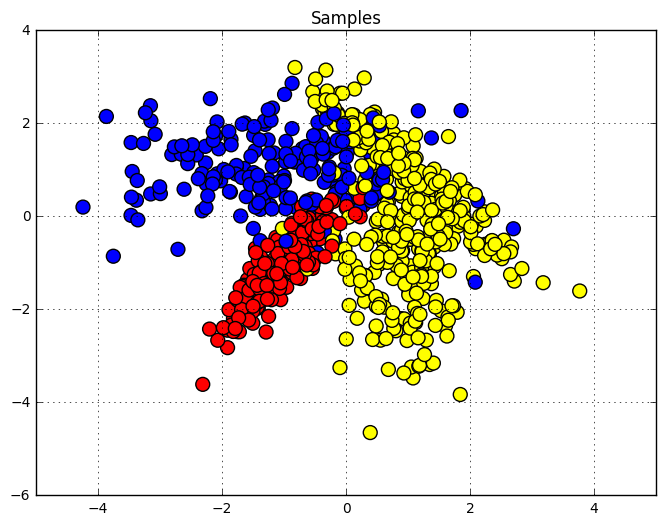

In [185]:
from sklearn import datasets
from matplotlib.colors import ListedColormap


classification_problem = datasets.make_classification(n_samples = 800, n_features =2, n_informative = 2, 
                                                      n_classes = 4, n_redundant=0, 
                                                      n_clusters_per_class=1, random_state = None)
colors = ListedColormap(['red', 'blue', 'yellow'])
light_colors = ListedColormap(['lightcoral', 'lightblue', 'lightyellow'])
pylab.figure(figsize=(8,6))
pylab.scatter(map(lambda x: x[0], classification_problem[0]), map(lambda x: x[1], classification_problem[0]), 
              c=classification_problem[1], cmap=colors, s=100)
pylab.title(u'Samples')
pylab.grid(True)



In [186]:
def get_meshgrid(data, step=.05, border=.5,):
    x_min, x_max = data[:, 0].min() - border, data[:, 0].max() + border
    y_min, y_max = data[:, 1].min() - border, data[:, 1].max() + border
    return np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))

def plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels, 
                          colors, light_colors, k, accuracy_list, fl):
    estimator.fit(train_data, train_labels)
    if (fl == True):
        pyplot.figure(figsize = (16, 6))

        pyplot.subplot(1,2,1)
        xx, yy = get_meshgrid(train_data)
        mesh_predictions = np.array(estimator.predict(np.c_[xx.ravel(), yy.ravel()])).reshape(xx.shape)
        pyplot.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
        pyplot.scatter(train_data[:, 0], train_data[:, 1], c = train_labels, s = 100, cmap = colors)
        pyplot.title('Train data, accuracy={:.2f}'.format(metrics.accuracy_score(train_labels, \
                                                                    estimator.predict(train_data))))

        pyplot.subplot(1,2,2)
        pyplot.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
        pyplot.scatter(test_data[:, 0], test_data[:, 1], c = test_labels, s = 100, cmap = colors)
        pyplot.title('Test data, accuracy={:.2f}'.format(metrics.accuracy_score(test_labels,\
                                                                    estimator.predict(test_data))))
        print "k =", k
        pyplot.show()
    accuracy_list.append(metrics.accuracy_score(test_labels, estimator.predict(test_data)))
    return accuracy_list

In [187]:
from sklearn import cross_validation, datasets, metrics, neighbors 
train_data, test_data, train_labels, test_labels = cross_validation.train_test_split(classification_problem[0], \
                            classification_problem[1], test_size = 0.2, random_state = 1)

k = 1


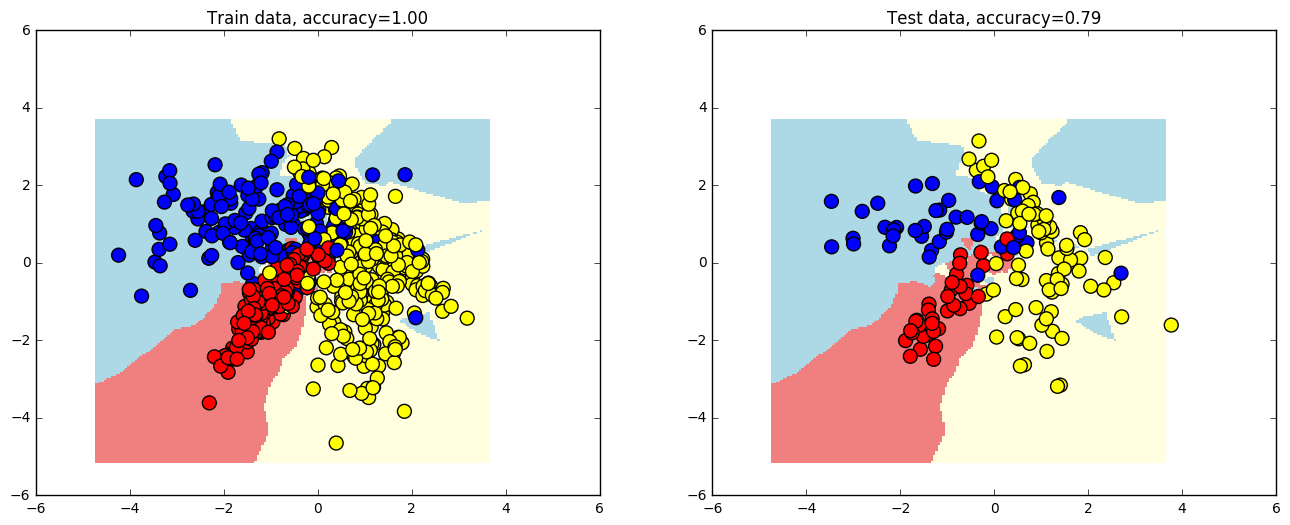

k = 2


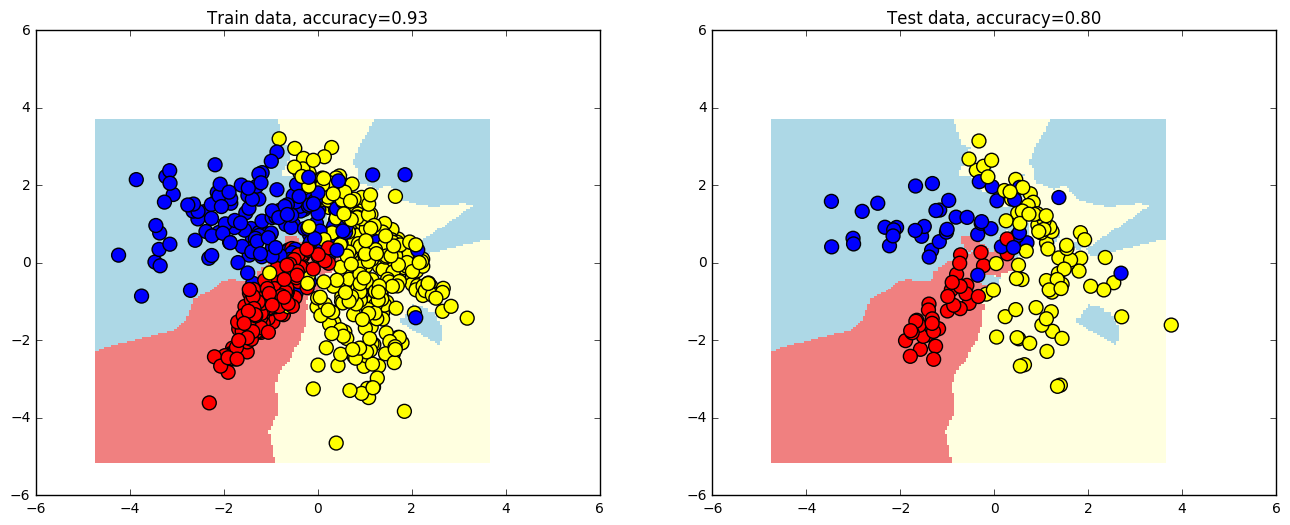

k = 3


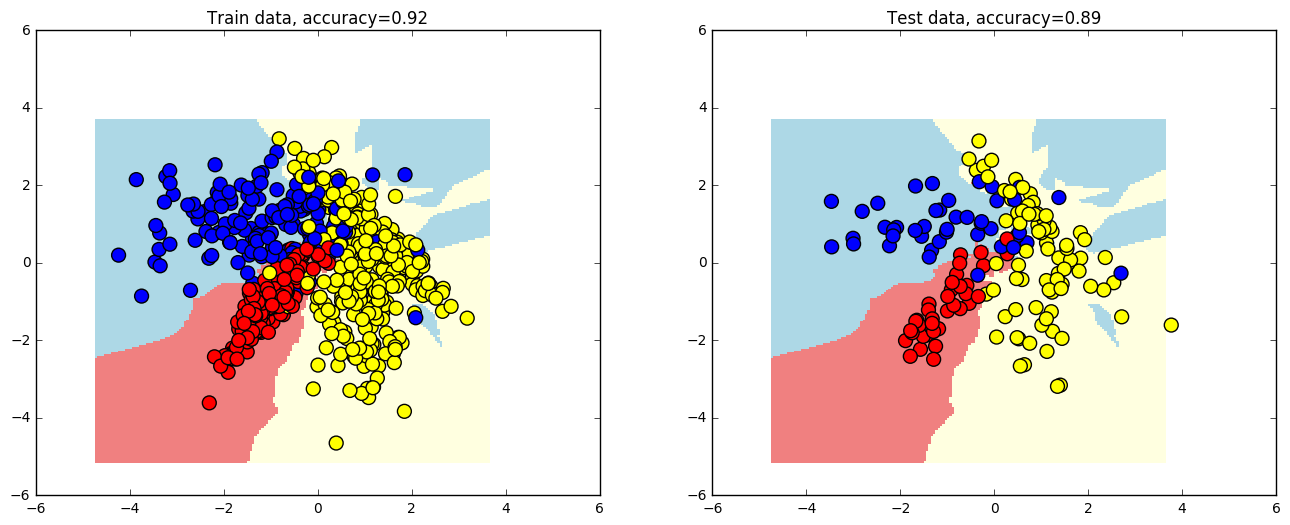

k = 4


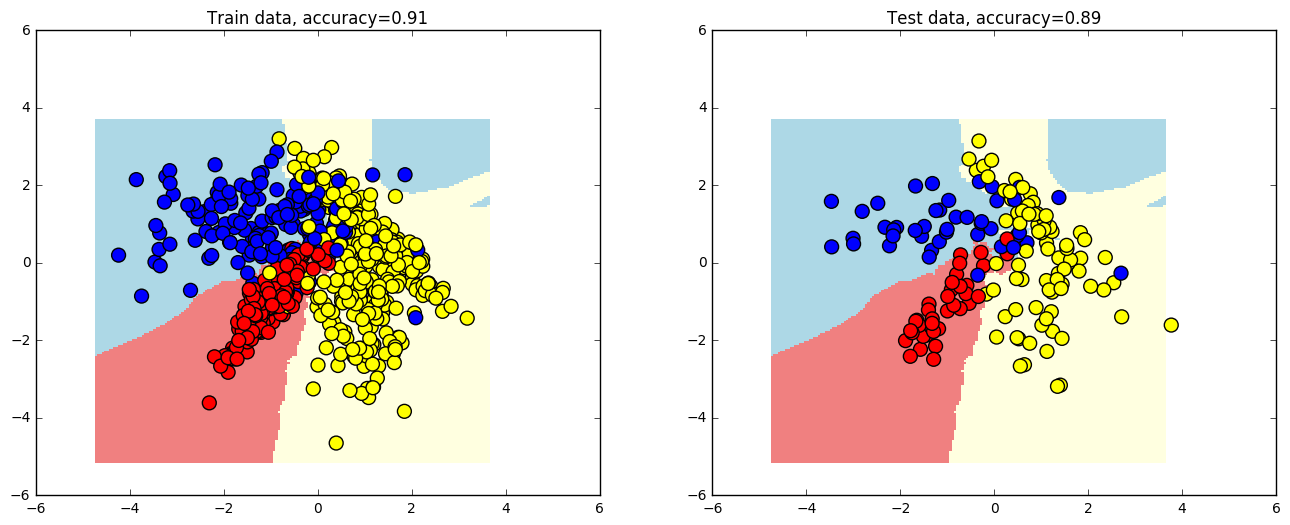

k = 5


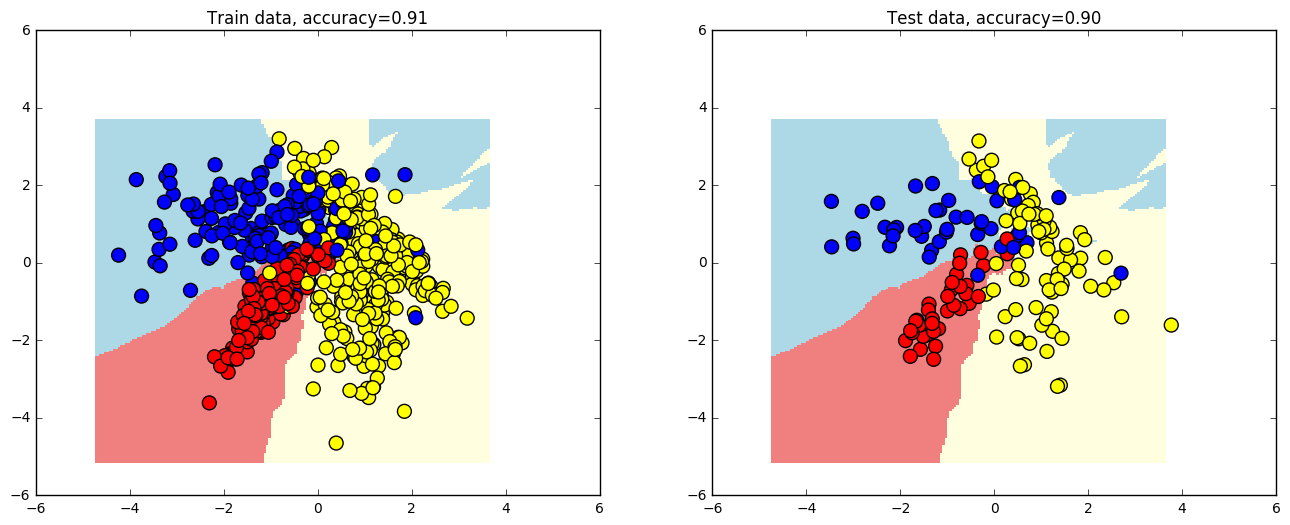

k = 6


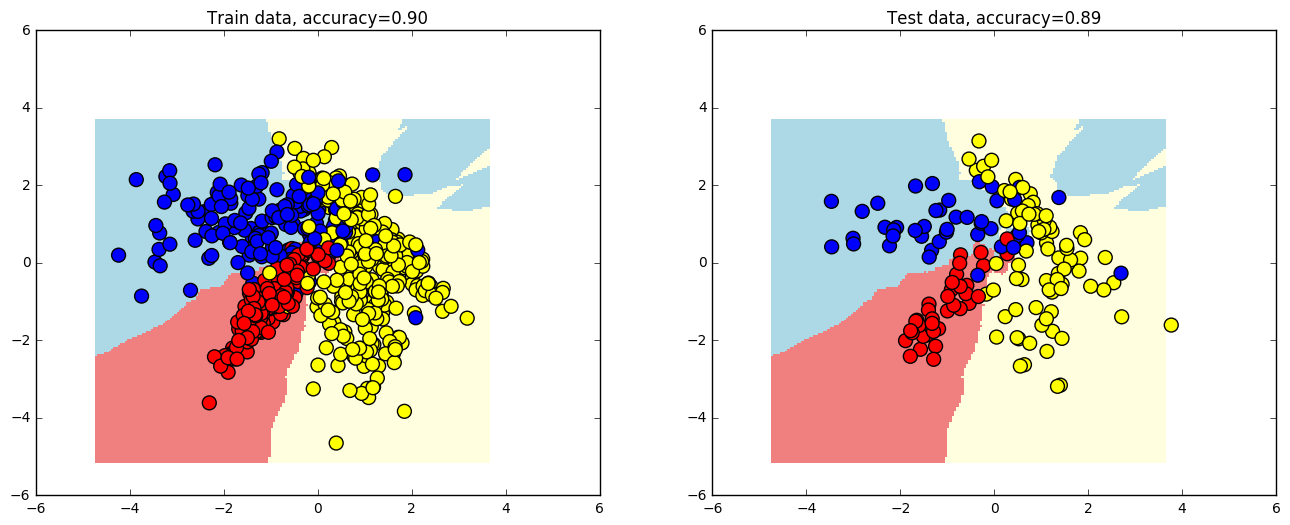

k = 30


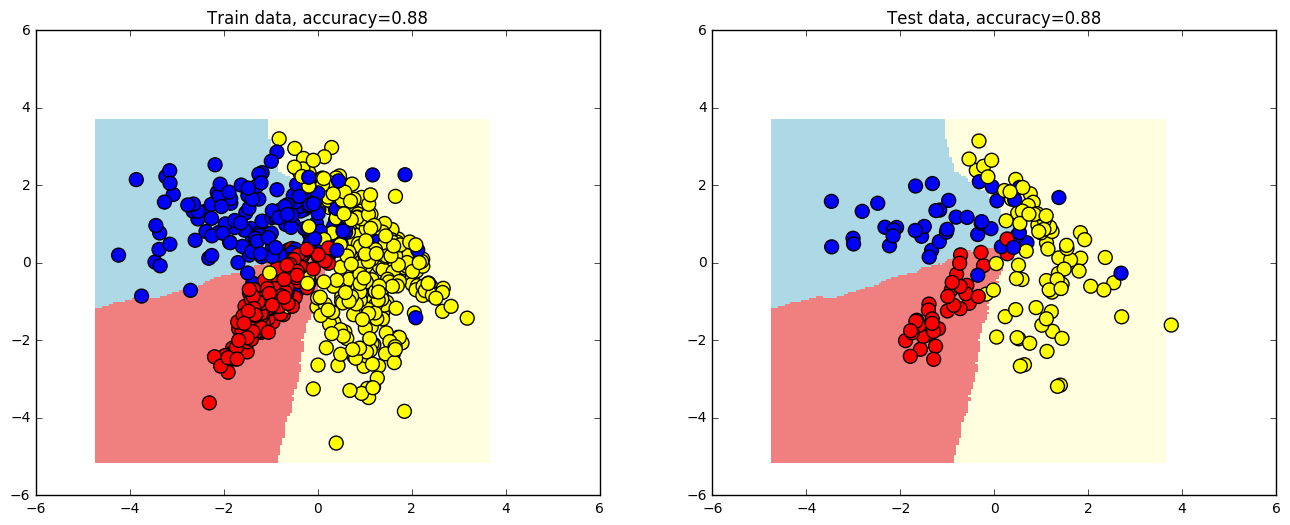

k = 60


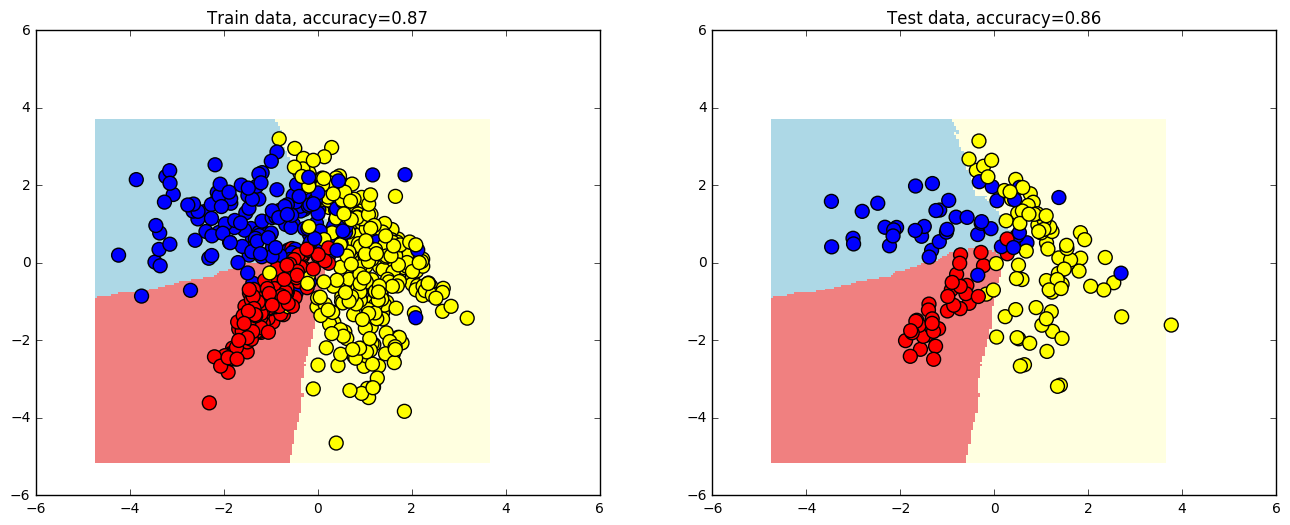

k = 90


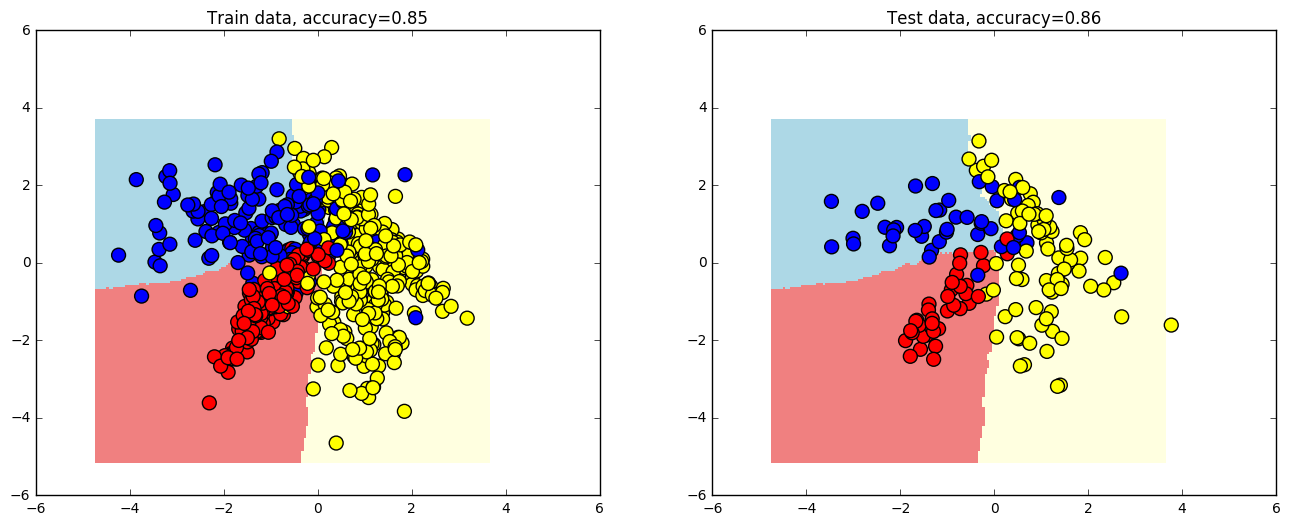

In [188]:
id_list = np.arange(1, 100, 1)
accuracy_list = []
for i in id_list:
    fl = False
    estimator = neighbors.KNeighborsClassifier(n_neighbors = i)
    if ((i < 7) or (i % 30 == 0)):
        fl = True
    accuracy_list = plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels, colors, light_colors, i,\
                         accuracy_list, fl)

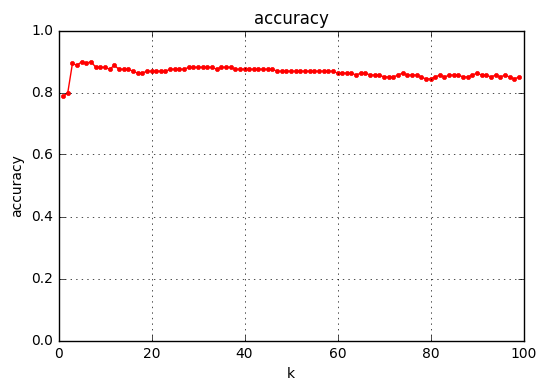

In [189]:
pyplot.plot(id_list, accuracy_list, 'r')
pyplot.plot(id_list, accuracy_list, 'r.')
pyplot.title('accuracy')
pyplot.xlabel('k')
pyplot.ylabel('accuracy')
pyplot.ylim([0, 1])
pyplot.grid(True)



Из полученных значений accuracy видно, что оптимальным значением параметра k является k ~ 5. При дальнейшем увеличении параметра k наблюдается выход на плато значения accuracy.

### 2. Наивный байесовский классификатор

In [190]:
from sklearn import datasets
from pandas import DataFrame
digits =  datasets.load_digits()

print "digits dataset:"
digits_frame = DataFrame(digits.data)
digits_frame['target'] = DataFrame(digits.target)
digits_frame.head()

digits dataset:


,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [191]:
print "breast_cancer dataset:"
breast_cancer = datasets.load_breast_cancer()
cancer_frame = DataFrame(breast_cancer.data)
cancer_frame['target'] = DataFrame(breast_cancer.target)
cancer_frame.head()

breast_cancer dataset:


,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [192]:
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn import naive_bayes

bern = naive_bayes.BernoulliNB()
mult = naive_bayes.MultinomialNB()
gauss = naive_bayes.GaussianNB()

digits_score_bern = cross_val_score(bern, digits.data, digits.target).mean()
digits_score_mult = cross_val_score(mult, digits.data, digits.target).mean()
digits_score_gauss = cross_val_score(gauss, digits.data, digits.target).mean()

print "digits_score_bern =", digits_score_bern
print "digits_score_mult =", digits_score_mult
print "digits_score_gauss =", digits_score_gauss

breast_cancer_score_bern = cross_val_score(bern, breast_cancer.data, breast_cancer.target).mean()
breast_cancer_score_mult = cross_val_score(mult, breast_cancer.data, breast_cancer.target).mean()
breast_cancer_score_gauss = cross_val_score(gauss, breast_cancer.data, breast_cancer.target).mean()

print "breast_cancer_score_bern =", breast_cancer_score_bern
print "breast_cancer_score_mult =", breast_cancer_score_mult
print "breast_cancer_score_gauss =", breast_cancer_score_gauss


digits_score_bern = 0.825823650778
digits_score_mult = 0.870877148974
digits_score_gauss = 0.818600380355
breast_cancer_score_bern = 0.627420402859
breast_cancer_score_mult = 0.894579040193
breast_cancer_score_gauss = 0.936749280609


Из полученных результатов видно, что наилучшим для выборки digits является классификатор MultinomialNB, а для выборки breast_cancer - GaussianNB.

а) Максимальное качество классификации на выборке breast_cancer составило 0.936749280609.


b) Максимальное качество классификации на выборке digits составило 0.870877148974.


c) Верны следующие утверждения: c, d.

### 3. Метрики в задаче регрессии

In [193]:
N = 500
x_left = 0
x_right = 10
x = np.linspace(x_left, x_right, N)
x_0 = x.copy()
k = 0.5
b = 1.
a = 0.
disp = 0.2
y = k * x + b
y_0 = y.copy()
from scipy.stats import norm
eps = norm.rvs(a, disp, N)
y += eps

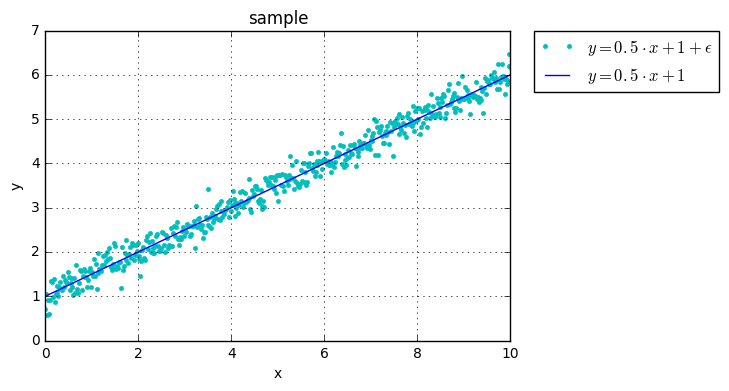

In [194]:
pyplot.plot(x, y, 'c.', label = '$y = 0.5\cdot x + 1 + \epsilon $')
pyplot.plot(x_0, y_0, 'b', label = '$y = 0.5\cdot x + 1$')
pyplot.xlabel('x')
pyplot.ylabel('y')
pyplot.title('sample')
pyplot.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
pyplot.grid(True)

In [195]:
sample = np.ndarray(shape=(2, y.size))
for i in range (0, y.size):
    sample[0, i] = x[i]
    sample[1, i] = y[i]
def MAE(arg, sample):
    res = 0
    size = sample[0].size
    for i in range(0, size):
        res += abs(arg[0] * sample[0][i] + arg[1] - sample[1][i]) / size
    return res

def MSE(arg, sample):
    res = 0
    size = sample[0].size
    for i in range(0, size):
        res += (arg[0] * sample[0][i] + arg[1] - sample[1][i])**2 / size
    return res**0.5

MAE estimation: k = 0.500550405434  b = 1.00800784573
MSE estimation: k = 0.501250149327  b = 1.00749226949


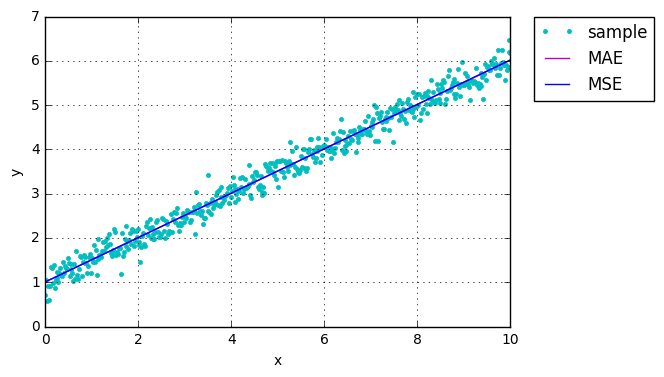

In [196]:
import scipy

MSE_arg = [0., 0.]
MAE_arg = [0., 0.]
res_MSE = [0., 0.]
res_MAE = [0., 0.]

res_MAE = scipy.optimize.minimize(MAE, MAE_arg, sample).x
res_MSE = scipy.optimize.minimize(MSE, MSE_arg, sample).x

pyplot.plot(x, y, 'c.', label = 'sample')
pyplot.plot(x, res_MAE[0] * x + res_MAE[1], 'm', label = 'MAE')
pyplot.plot(x, res_MSE[0] * x + res_MSE[1], 'b', label = 'MSE')
pyplot.xlabel('x')
pyplot.ylabel('y')
pyplot.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
pyplot.grid(True)
print "MAE estimation: k =", res_MAE[0], " b =", res_MAE[1]
print "MSE estimation: k =", res_MSE[0], " b =", res_MSE[1]

Из полученных результатов видно, что оценки параметров, полученные с помощью минимизации MSE и MAE совпали и близки к изначальной прямой без шума.

Добавим выбросы в выборку.

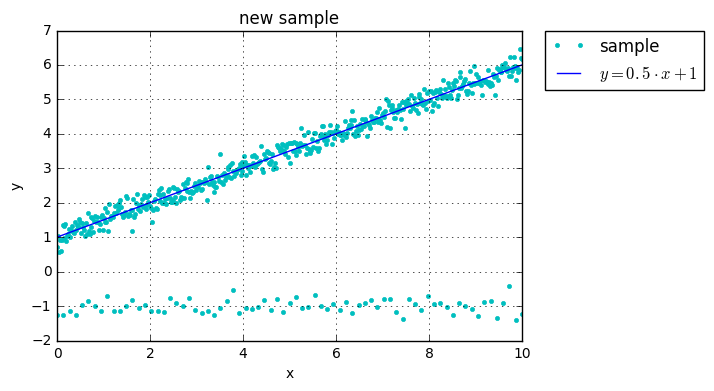

In [197]:
M = 75
x_add = np.linspace(x_left, x_right, M)
for i in range(0, M):
    y = np.append(y, -1 + norm.rvs(a, disp))
    x = np.append(x, x_add[i])
pyplot.plot(x, y, 'c.', label = 'sample')
pyplot.plot(x_0, y_0, 'b', label = '$y = 0.5\cdot x + 1$')
pyplot.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
pyplot.xlabel('x')
pyplot.ylabel('y')
pyplot.title('new sample')
pyplot.grid(True)

MAE estimation: k = 0.501959144365  b = 1.00800784573
MSE estimation: k = 0.435285143721  b = 1.00749226949


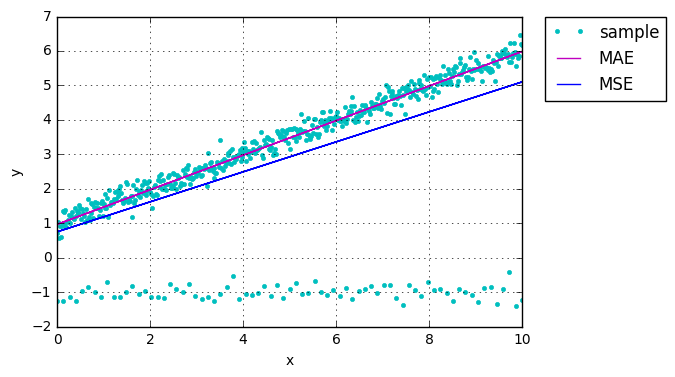

In [198]:
new_sample = np.ndarray(shape=(2, N + M))
for i in range (0, y.size):
    new_sample[0][i] = x[i]
    new_sample[1][i] = y[i]

new_MSE_arg = [0., 0.]
new_MAE_arg = [0., 0.]
new_res_MSE = [0., 0.]
new_res_MAE = [0., 0.]

new_res_MAE = scipy.optimize.minimize(MAE, new_MAE_arg, new_sample).x
new_res_MSE = scipy.optimize.minimize(MSE, new_MSE_arg, new_sample).x

pyplot.plot(x, y, 'c.', label = 'sample')
pyplot.plot(x, new_res_MAE[0] * x + new_res_MAE[1], 'm', label = 'MAE')
pyplot.plot(x, new_res_MSE[0] * x + new_res_MSE[1], 'b', label = 'MSE')
pyplot.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
pyplot.xlabel('x')
pyplot.ylabel('y')
pyplot.grid(True)

print "MAE estimation: k =", new_res_MAE[0], " b =", res_MAE[1]
print "MSE estimation: k =", new_res_MSE[0], " b =", res_MSE[1]

Из полученных результатов видно, что MAE более устойчив к выбросам по сравнению с MSE.

### 4.1. Наивный байес и центроидный классификатор

Рассмотрим вероятность 

## $P(x|y) = \prod_{k = 1}^{N}{P(x^{(k)}|y)} = \prod_{k = 1}^{N} \frac{1}{\sqrt{2\pi\sigma^2}}\cdot e^{-\frac{\left(x^{(k)} - \mu_{yk}\right)^2}{2\sigma^2}} = \frac{1}{\left(\sqrt{2\pi\sigma^2}\right)^N}\cdot e^{-\frac{\sum_{k=1}^{N}{\left(x^{(k)} - \mu_{yk}\right)^2}}{2\sigma^2}}$.
Заметим, что 
## $C = \frac{1}{\left(\sqrt{2\pi\sigma^2}\right)^N} = const$
## $A = \frac{1}{2\cdot\sigma^2} = const$
## $\sum_{k=1}^{N}{\left(x^{(k)} - \mu_{yk}\right)^2} = \rho(x, \mu_y)$
тогда все выражение принимает вид 
## $P(x|y) = C \cdot \left(e^A\right)^{-\rho(x, \mu_y)}$ 
и увеличивается при уменьшении $\rho(x, \mu_y)$. То есть объект с большей вероятностью будет отнесен к классу, центр которого находится к нему ближе всего.

### 4.2. ROC-AUC случайных ответов

## $TPR = \frac{tp}{tp + fn}$
## $FPR = \frac{fp}{fp + tn}$
Для того, чтобы ROC-AUC = 0.5, необходимо, чтобы $E(TPR) = E(FPR)$.
Пусть всего N объектов из двух классов, $\alpha \cdot N$ из которых относится к 1 классу, $(1 - \alpha)\cdot N$ - ко 2 классу.
## $tp = p \cdot \alpha \cdot N$
## $fp = p \cdot (1 - \alpha) \cdot N$
## $tn = (1 - p)\cdot (1 - \alpha) \cdot N$
## $fn = (1 - p)\cdot \alpha \cdot N$
## $E(TPR) = \frac{p\alpha N}{p \alpha N + (1 - p) \alpha N} = p$
## $E(FPR) = \frac{(1 - \alpha)np}{(1 - \alpha)np + (1 - \alpha)n(1 - p)} = p$
## $\Rightarrow E(TPR) = E(FPR)$.
Из того, что $E(TPR) + E(FPR) = 1$, следует, что $E(TPR) = E(FPR) = \frac{1}{2}$.

### 4.3. Ошибка 1NN и оптимального байесовского классификатора.

Байесовский классификатор ошибается на объекте $х$ с вероятностью $E_B = min{P(1|x), P(0|x)}$.

Метод ближайшего соседа ошибается с вероятностью $E_N = P(y \ne y_n) = $

$ = P(y = 1, y_n = 0) + P(y = 0, y_n = 1) = \{ \text{в силу предположения независимости и непрерывности} \} = 2 \cdot P(y = 1)P(y = 0)$.

В силу непрерывности вероятности можем рассмотреть предел при $n \to \infty$:
$ \lim_{n \to \infty}{\frac{E_N}{E_B}} = \frac{2P(y = 1)P(y = 0)}{min\{P(y = 1), P(y = 0)\}} = 2\cdot P(y = i) \le 2, i \in \{0, 1\}$, что и требовалось доказать.